## 1. Data downloading
Firstly, we load in all of the collected databases.

List of neighborhoods in Riga:

In [70]:
import pandas as pd

#Load list of Riga neighborhoods
Riga_neigh = pd.read_excel('Riga_Neigh.xlsx')
Riga_neigh.head()

,Neighborhood,District
0,Purvciems,NaN
1,Ķengarags,NaN
2,Imanta,NaN
3,Pļavnieki,NaN
4,Centrs,Central District


Basic statistics from apkaimes.lv homepage:

In [71]:
Riga_stats=pd.read_excel('Riga_Stats.xlsx')
Riga_stats=Riga_stats.rename(columns={'Apkaime':'Neighborhood','Ha':'Size (Ha)'})
Riga_stats.head()

,Neighborhood,Size (Ha),Inhabitants 2014,Employed 2008
0,Purvciems,501.7,59940,13280
1,Ķengarags,519.0,50287,10526
2,Imanta,900.3,47310,16082
3,Pļavnieki,298.5,47185,5823
4,Centrs,373.2,35274,69341


Codes for nieghborhoods in order to access data from Latvian Open Data portal:

In [72]:
Neigh_codes=pd.read_excel('Apkaimes.xlsx')
Neigh_codes=Neigh_codes.rename(columns={'Name':'Neighborhood'})
Neigh_codes.head()

,Code,Neighborhood
0,10001,Kleisti
1,10002,Jugla
2,10003,Mežaparks
3,10004,Trīsciems
4,10005,Ziepniekkalns


Inserting codes into the main table:

In [73]:
Riga_stats=Riga_stats.merge(Neigh_codes,on='Neighborhood',how='left')
column_change = [Riga_stats.columns[-1]] + list(Riga_stats.columns[:-1])
Riga_stats = Riga_stats[column_change]
Riga_stats.head()

,Code,Neighborhood,Size (Ha),Inhabitants 2014,Employed 2008
0,10025,Purvciems,501.7,59940,13280
1,10023,Ķengarags,519.0,50287,10526
2,10010,Imanta,900.3,47310,16082
3,10040,Pļavnieki,298.5,47185,5823
4,10034,Centrs,373.2,35274,69341


Adding 2 zeros in front of codes to make them appropriate:

In [74]:
Riga_stats['Code'] = Riga_stats['Code'].apply(lambda x: '{0:0>7}'.format(x))

Load wages data, add them to the main dataframe and drop unnecessary columns:

In [75]:
Riga_wages=pd.read_csv('income_2019.csv')
Riga_wages.head()

,Year,Level,Code,Income_avg,Income_median,Employed
0,2019,0,LV,997,758,920373
1,2019,1,LV003,864,697,108961
2,2019,1,LV005,759,611,107669
3,2019,1,LV006,1127,842,322880
4,2019,1,LV007,1104,819,185426


In [76]:
Riga_stats=Riga_stats.merge(Riga_wages,on='Code',how='left')
Riga_stats.head()

,Code,Neighborhood,Size (Ha),Inhabitants 2014,Employed 2008,Year,Level,Income_avg,Income_median,Employed
0,0010025,Purvciems,501.7,59940,13280,2019,5,1147,873,27778
1,0010023,Ķengarags,519.0,50287,10526,2019,5,989,807,23645
2,0010010,Imanta,900.3,47310,16082,2019,5,1093,844,21366
3,0010040,Pļavnieki,298.5,47185,5823,2019,5,1028,805,21642
4,0010034,Centrs,373.2,35274,69341,2019,5,1521,994,15986


In [77]:
Riga_stats.drop(Riga_wages.columns[[0,1,4,5]],axis=1,inplace=True)
Riga_stats=Riga_stats.rename(columns={'Income_avg':'Income 2019'})
Riga_stats.head()

,Code,Neighborhood,Size (Ha),Inhabitants 2014,Employed 2008,Income 2019
0,0010025,Purvciems,501.7,59940,13280,1147
1,0010023,Ķengarags,519.0,50287,10526,989
2,0010010,Imanta,900.3,47310,16082,1093
3,0010040,Pļavnieki,298.5,47185,5823,1028
4,0010034,Centrs,373.2,35274,69341,1521


Load more recent population data, add it to the main dataframe:

In [78]:
Riga_pop=pd.read_csv('population_number_sex_age_8.csv')
Riga_pop.head()

,Year,Level,Code,Total,M,M_pct,F,F_pct,_0_6,_0_6_pct,...,M_55_64,M_65,F_0_6,F_7_14,F_15_24,F_25_34,F_35_44,F_45_54,F_55_64,F_65
0,2000,0,LV,2377062,1094770.0,46.0,1282292.0,54.0,147266.0,6.0,...,123056.0,112142.0,71766.0,138440.0,166303.0,161565.0,181014.0,158350.0,165021.0,239815.0
1,2000,1,LV003,319827,149161.0,47.0,170666.0,53.0,22976.0,7.0,...,16751.0,14855.0,11147.0,20101.0,22382.0,21160.0,23399.0,20348.0,21792.0,30330.0
2,2000,1,LV005,383992,178784.0,47.0,205208.0,53.0,23251.0,6.0,...,20090.0,19235.0,11402.0,22433.0,25793.0,25670.0,28166.0,23941.0,25712.0,42091.0
3,2000,1,LV006,762505,341386.0,45.0,421119.0,55.0,38205.0,5.0,...,38862.0,37981.0,18523.0,37864.0,53425.0,53411.0,62944.0,57755.0,56156.0,81035.0
4,2000,1,LV007,361894,167904.0,46.0,193990.0,54.0,24305.0,7.0,...,19127.0,15268.0,11857.0,22288.0,26401.0,25025.0,27099.0,24158.0,24895.0,32266.0


In [79]:
Riga_stats=Riga_stats.merge(Riga_pop.loc[Riga_pop['Year']==2019,['Code','Total']],on='Code',how='left')
Riga_stats.head()

,Code,Neighborhood,Size (Ha),Inhabitants 2014,Employed 2008,Income 2019,Total
0,0010025,Purvciems,501.7,59940,13280,1147,55579
1,0010023,Ķengarags,519.0,50287,10526,989,46541
2,0010010,Imanta,900.3,47310,16082,1093,44189
3,0010040,Pļavnieki,298.5,47185,5823,1028,42048
4,0010034,Centrs,373.2,35274,69341,1521,30557


In [80]:
Riga_stats=Riga_stats.rename(columns={'Total':'Population 2019'})

Load employment data and again add it to the main dataframe,do some formatting:

In [81]:
Riga_employ=pd.read_csv('vdvv_econ_ind_nace_all.csv')
Riga_employ.shape

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(241352, 12)

In [82]:
Riga_stats=Riga_stats.merge(Riga_employ.loc[Riga_employ['NACE']=='TOTAL',['Code','Total']],on='Code',how='left')
Riga_stats.head()

,Code,Neighborhood,Size (Ha),Inhabitants 2014,Employed 2008,Income 2019,Population 2019,Total
0,0010025,Purvciems,501.7,59940,13280,1147,55579,16748.0
1,0010023,Ķengarags,519.0,50287,10526,989,46541,12692.0
2,0010010,Imanta,900.3,47310,16082,1093,44189,15237.0
3,0010040,Pļavnieki,298.5,47185,5823,1028,42048,8412.0
4,0010034,Centrs,373.2,35274,69341,1521,30557,74626.0


In [83]:
Riga_stats=Riga_stats.rename(columns={'Total':'Employed 2017'})
Riga_stats=Riga_stats.astype({'Employed 2017':'int32'})

In [84]:
Riga_stats.head()

,Code,Neighborhood,Size (Ha),Inhabitants 2014,Employed 2008,Income 2019,Population 2019,Employed 2017
0,0010025,Purvciems,501.7,59940,13280,1147,55579,16748
1,0010023,Ķengarags,519.0,50287,10526,989,46541,12692
2,0010010,Imanta,900.3,47310,16082,1093,44189,15237
3,0010040,Pļavnieki,298.5,47185,5823,1028,42048,8412
4,0010034,Centrs,373.2,35274,69341,1521,30557,74626


Calculate nubmer of people employed in 2019:

In [85]:
Pop_change_19_17=Riga_stats['Population 2019'].sum()/Riga_stats.merge(Riga_pop.loc[Riga_pop['Year']==2017,['Code','Total']],on='Code',how='left')['Total'].sum()
Pop_change_19_17

0.9868078262696056

In [86]:
Riga_stats['Employed 2019*']=Riga_stats['Employed 2017']*Pop_change_19_17
Riga_stats.head()

,Code,Neighborhood,Size (Ha),Inhabitants 2014,Employed 2008,Income 2019,Population 2019,Employed 2017,Employed 2019*
0,0010025,Purvciems,501.7,59940,13280,1147,55579,16748,16527.057474
1,0010023,Ķengarags,519.0,50287,10526,989,46541,12692,12524.564931
2,0010010,Imanta,900.3,47310,16082,1093,44189,15237,15035.990849
3,0010040,Pļavnieki,298.5,47185,5823,1028,42048,8412,8301.027435
4,0010034,Centrs,373.2,35274,69341,1521,30557,74626,73641.520843


Drop unnecessary columns:

In [87]:
Riga_stats=Riga_stats.round({'Employed 2019*':0})
Riga_stats=Riga_stats.drop(columns=['Inhabitants 2014','Employed 2008'])
Riga_stats=Riga_stats.drop(columns=['Employed 2017'])

Gather descriptive statistics on the data collected:

In [21]:
Riga_stats.describe().round()

,Size (Ha),Income 2019,Population 2019,Employed 2019*
count,58.0,58.0,58.0,58.0
mean,515.0,1153.0,10854.0,8134.0
std,356.0,265.0,13409.0,11286.0
min,74.0,654.0,69.0,39.0
25%,244.0,1018.0,1216.0,792.0
50%,443.0,1106.0,4989.0,4085.0
75%,699.0,1243.0,17244.0,13506.0
max,1873.0,2316.0,55579.0,73642.0


Top 10 neighborhoods for each variable and their respective values:

In [22]:
Riga_stats_sorted=pd.DataFrame()
for col in Riga_stats.columns[2:6]:
    Riga_stats_sorted[col]=Riga_stats.sort_values(by=col,ascending=False)['Neighborhood'].reset_index(drop=True)
    Riga_stats_sorted[col+'#']=Riga_stats.sort_values(by=col,ascending=False)[col].reset_index(drop=True)
Riga_stats_sorted.head(10)

,Size (Ha),Size (Ha)#,Income 2019,Income 2019#,Population 2019,Population 2019#,Employed 2019*,Employed 2019*#
0,Kleisti,1873.0,Skanste,2316,Purvciems,55579,Centrs,73642.0
1,Jugla,1409.9,Vecpilsēta,1805,Ķengarags,46541,Maskavas forštate,25599.0
2,Mežaparks,1182.1,Buļļi,1665,Imanta,44189,Teika,25159.0
3,Trīsciems,1131.9,Ķīpsala,1552,Pļavnieki,42048,Vecpilsēta,22810.0
4,Daugavgrīva,1014.7,Centrs,1521,Ziepniekkalns,32108,Sarkandaugava,18803.0
5,Šķirotava,1005.7,Suži,1472,Centrs,30557,Āgenskalns,17439.0
6,Spilve,957.6,Mežaparks,1468,Teika,28720,Brasa,17190.0
7,Jaunciems,913.2,Vecāķi,1402,Āgenskalns,25047,Torņakalns,16792.0
8,Imanta,900.3,Brasa,1351,Maskavas forštate,24659,Purvciems,16527.0
9,Bolderāja,832.9,Bieriņi,1343,Jugla,24011,Čiekurkalns,16236.0


Bottom 10 neighborhoods for each variable and their respective values:

In [23]:
Riga_stats_sorted_bot=pd.DataFrame()
for col in Riga_stats.columns[2:6]:
    Riga_stats_sorted_bot[col]=Riga_stats.sort_values(by=col,ascending=True)['Neighborhood'].reset_index(drop=True)
    Riga_stats_sorted_bot[col+'#']=Riga_stats.sort_values(by=col,ascending=True)[col].reset_index(drop=True)
Riga_stats_sorted_bot.head(10)

,Size (Ha),Size (Ha)#,Income 2019,Income 2019#,Population 2019,Population 2019#,Employed 2019*,Employed 2019*#
0,Atgāzene,74.5,Spilve,654,Spilve,69,Buļļi,39.0
1,Vecpilsēta,94.4,Voleri,732,Salas,70,Suži,62.0
2,Zasulauks,119.0,Katlakalns,829,Katlakalns,185,Mūkupurvs,142.0
3,Beberbeķi,120.4,Rumbula,878,Mūkupurvs,237,Vecdaugava,150.0
4,Šampēteris,136.6,Bolderāja,879,Voleri,255,Beberbeķi,206.0
5,Grīziņkalns,151.7,Kundziņsala,880,Buļļi,295,Vecāķi,316.0
6,Katlakalns,155.4,Daugavgrīva,916,Kundziņsala,345,Brekši,353.0
7,Brasa,174.1,Vecmīlgrāvis,921,Kleisti,437,Trīsciems,398.0
8,Avoti,181.5,Brekši,930,Suži,460,Jaunciems,410.0
9,Ķīpsala,197.5,Maskavas forštate,960,Beberbeķi,462,Voleri,502.0


Some final formatting of neighborhood list:

In [88]:
import numpy as np
Riga_neigh.loc[pd.isnull(Riga_neigh['District']),'District']=''
Riga_neigh.head()

,Neighborhood,District
0,Purvciems,
1,Ķengarags,
2,Imanta,
3,Pļavnieki,
4,Centrs,Central District


## 2. Foursqaure venues and clusterization wit frequency of venue categories

In [20]:
!conda install -c conda-forge googlemaps --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - googlemaps


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    googlemaps-2.5.1           |             py_0          23 KB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-forge
    requests-2.24.0            |     pyh9f0ad1d_0          47 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  brotlipy           conda-forge/linux-64::brotlipy-0.7.0-p

Obtain location data for each neighborhood by Google Maps API:

In [22]:
import googlemaps
gmaps = googlemaps.Client(key='')
R_locations=[]
for neigh,disc in zip(Riga_neigh['Neighborhood'],Riga_neigh['District']):
    geocode_result = gmaps.geocode(neigh+','+disc+',Riga')
    latitude = geocode_result[0]['geometry']['location'] ['lat']
    longitude = geocode_result[0]['geometry']['location'] ['lng']
    R_locations.append([(neigh,latitude,longitude)])
    R_df = pd.DataFrame([item for R_locations in R_locations for item in R_locations])
    R_df.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude']
R_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude
0,Purvciems,56.958082,24.183964
1,Ķengarags,56.907457,24.182713
2,Imanta,56.956672,24.015233
3,Pļavnieki,56.939660,24.204092
4,Centrs,56.957127,24.115620


Foursquare credentials:

In [26]:
CLIENT_ID = 'UNOJDCQH4GLAWEX422WINWFES5GAKQLLBSD135VKOTFPFZIL' #Foursquare ID
CLIENT_SECRET = '4CQFM1QAYYKXTM1MEJOIROCFFEHMUUWQFPZB01ADJNA1BJC0' #Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=100 #maximum number of venues to retrieve

Function that gathers venues neraby the centers of neighborhoods by using Foursqaure API:

In [94]:
import requests
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create dataframe from information collected in previous step:

In [95]:
Riga_venues = getNearbyVenues(names=R_df['Neighborhood'],
                                   latitudes=R_df['Neighborhood Latitude'],
                                   longitudes=R_df['Neighborhood Longitude'],radius=750
                                  )

In [96]:
Riga_venues.shape

(1184, 7)

Count number of venues in each neighborhood:

In [97]:
df=Riga_venues.groupby('Neighborhood').count()
df.drop(columns=df.columns[1:6],inplace=True)
df=df.rename(columns={'Neighborhood Latitude':'Number of Venues'})
df.head(10)

,Number of Venues
Neighborhood,
Atgāzene,18
Avoti,70
Beberbeķi,9
Berģi,3
Bieriņi,12
Bišumuiža,9
Bolderāja,7
Brasa,53
Brekši,6


Find neighborhoods without any venues and check their profile. As it turns out there is only one such neighborhood.

In [99]:
R=Riga_stats
R=R.merge(df,on='Neighborhood',how='left')
R.loc[np.isnan(R['Number of Venues'])]

,Code,Neighborhood,Size (Ha),Income 2019,Population 2019,Employed 2019*,Number of Venues
52,0010001,Kleisti,1873.0,1131,437,744.0,NaN


What is the number of neighborhoods with venue count below 10 and what is median number of venues:

In [101]:
R[R['Number of Venues']<10].shape

(23, 7)

In [100]:
import statistics as stat
stat.median(df['Number of Venues'])

14

Compute proportion of each venue category in each neeighborhood:

In [102]:
#create binary variables for each venue category
Riga_dummies = pd.get_dummies(Riga_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Riga_dummies['Neighborhood'] = Riga_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Riga_dummies.columns[-1]] + list(Riga_dummies.columns[:-1])
Riga_dummies = Riga_dummies[fixed_columns]


Riga_grouped = Riga_dummies.groupby('Neighborhood').mean().reset_index()
Riga_grouped.head()

,Neighborhood,Zoo,ATM,Adult Boutique,Airport,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Atgāzene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.055556,0.000000,0.000000,0.0,0.0,0.000000
1,Avoti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014286,0.0,...,0.0,0.028571,0.0,0.0,0.000000,0.014286,0.014286,0.0,0.0,0.014286
2,Beberbeķi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
3,Berģi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,Bieriņi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000


From the data on venue category proportions find the optimal number of clusters. Graph sum of squared errors vs number of clusters.

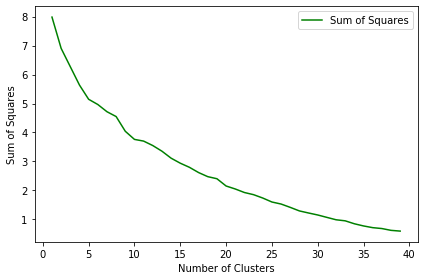

In [103]:
from sklearn.cluster import KMeans 

#prepare the data set
Riga_grouped_clustering = Riga_grouped.drop('Neighborhood', 1)

#set maximum number of clusters
K=40
SS=np.zeros((K-1))

#calculate sum of squared errors for each number of clusters
for i in range(1,K):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(Riga_grouped_clustering)
    SS[i-1] = kmeans.inertia_

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,K),SS,'g')
plt.legend(['Sum of Squares'])
plt.ylabel('Sum of Squares')
plt.xlabel('Number of Clusters')
plt.tight_layout()
plt.savefig('Kmeans_SS_1.png')
plt.show()

Optimum is determined to be 10. Do clustering with 10 clusters and show number of neighborhoods in each cluster. Note that nubmers exhibited here were not used in the final report as Foursquare data changed when rerunning the code with comments. Data in final report more clearly shows the problem with this clustering.

In [109]:
kclusters=10
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Riga_grouped_clustering)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([10,  1,  6,  1,  3,  1,  1, 28,  1,  5]))

Additionally do the clustering with 6 clusters to check if situation is better.

In [106]:
kclusters=6
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Riga_grouped_clustering)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 6, 16,  1,  7,  1, 26]))

Create a function that for a given array summarizes top x venue categories:

In [110]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Apply the function to our collected data on venues in Riga:

In [111]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Riga_venues_sorted = pd.DataFrame(columns=columns)
Riga_venues_sorted['Neighborhood'] = Riga_grouped['Neighborhood']

for ind in np.arange(Riga_grouped.shape[0]):
    Riga_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Riga_grouped.iloc[ind, :], num_top_venues)

In [112]:
Riga_venues_sorted.insert(1, 'Cluster Labels', kmeans.labels_)
Riga_venues_sorted.head(10)

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Atgāzene,0,Bus Stop,Bakery,Diner,Fast Food Restaurant,Motorcycle Shop,Bed & Breakfast,Bus Station,Liquor Store,Light Rail Station,Café
1,Avoti,7,Café,Coffee Shop,Restaurant,Bar,Dance Studio,Spa,Burger Joint,Salon / Barbershop,Park,Diner
2,Beberbeķi,0,Diner,Rental Car Location,Bus Stop,Restaurant,Farmers Market,BBQ Joint,Café,Auto Garage,Bus Station,Dog Run
3,Berģi,8,Lake,Beach,Yoga Studio,Discount Store,Farmers Market,Farm,Fabric Shop,Exhibit,Event Space,Electronics Store
4,Bieriņi,0,Bakery,Bus Stop,Miscellaneous Shop,Trail,Sculpture Garden,Eastern European Restaurant,Basketball Court,Track,Bus Station,Dance Studio
5,Bišumuiža,0,Bus Stop,Burger Joint,Auto Garage,Train Station,Forest,Bus Station,Convenience Store,Harbor / Marina,Skate Park,Event Space
6,Bolderāja,9,Food & Drink Shop,Bus Stop,Lake,Deli / Bodega,Park,Grocery Store,Electronics Store,Event Space,Eastern European Restaurant,Disc Golf
7,Brasa,7,Sporting Goods Shop,Arcade,Pizza Place,Diner,Park,Bistro,Gym / Fitness Center,Pool,College Gym,Flower Shop
8,Brekši,9,Grocery Store,Bus Stop,Park,Beach,Supermarket,Dumpling Restaurant,Dive Bar,Doctor's Office,Dog Run,Donut Shop
9,Bukulti,4,Bus Stop,Comfort Food Restaurant,Yoga Studio,Discount Store,Farmers Market,Farm,Fabric Shop,Exhibit,Event Space,Electronics Store


## 3. RA index

Create a list venue categories to be designated as restaurants:

In [114]:
restaurants=[x for x in Riga_grouped.columns if 'Restaurant' in x]
add=['Breakfast Spot','Burger Joint','Diner','Food','Food Court','Noodle House','Salad Place','Soup Place']
restaurants.extend(add)
restaurants

['American Restaurant',
 'Asian Restaurant',
 'Belgian Restaurant',
 'Chinese Restaurant',
 'Comfort Food Restaurant',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Fast Food Restaurant',
 'French Restaurant',
 'Indian Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Kebab Restaurant',
 'Mexican Restaurant',
 'Middle Eastern Restaurant',
 'Modern European Restaurant',
 'Restaurant',
 'Seafood Restaurant',
 'Spanish Restaurant',
 'Sushi Restaurant',
 'Theme Restaurant',
 'Turkish Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Vietnamese Restaurant',
 'Breakfast Spot',
 'Burger Joint',
 'Diner',
 'Food',
 'Food Court',
 'Noodle House',
 'Salad Place',
 'Soup Place']

Count restaurants by neighborhood:

In [115]:
Riga_rest=Riga_venues[Riga_venues['Venue Category'].isin(restaurants)].reset_index(drop=True)
Riga_rest_count=Riga_rest.groupby('Neighborhood').count()
Riga_rest_count.drop(columns=Riga_rest_count.columns[1:6],inplace=True)
Riga_rest_count.rename(columns={'Neighborhood Latitude':'Restaurants'},inplace=True)
Riga_rest_count

,Restaurants
Neighborhood,
Atgāzene,2
Avoti,11
Beberbeķi,2
Bieriņi,1
Bišumuiža,1
Brasa,9
Bukulti,1
Buļļi,1
Centrs,28


Do some statistics on restaurant count, including histogram:

In [116]:
print(Riga_rest_count.mean())
stat.median(Riga_rest_count['Restaurants'])

Restaurants    4.461538
dtype: float64


2

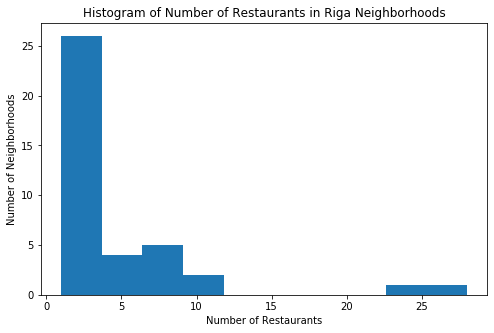

In [117]:
Riga_rest_count['Restaurants'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Number of Restaurants in Riga Neighborhoods') # add a title to the histogram
plt.ylabel('Number of Neighborhoods') # add y-label
plt.xlabel('Number of Restaurants') # add x-label
plt.savefig('Rest_hist.png')
plt.show()

Add restaurant count data to main dataframe:

In [118]:
Riga_stats=Riga_stats.merge(Riga_rest_count,on='Neighborhood',how='left')
Riga_stats.loc[np.isnan(Riga_stats['Restaurants']),'Restaurants']=0

Calculate three components of Restaurant Attractiviness index:

In [119]:
Riga_stats['Pop + Employ 2019']=Riga_stats['Population 2019']+Riga_stats['Employed 2019*']
Riga_stats['Pop + Employ Density']=Riga_stats['Pop + Employ 2019']/Riga_stats['Size (Ha)']
Riga_stats['Rest Density']=Riga_stats['Restaurants']/Riga_stats['Pop + Employ 2019']*1000

from sklearn import preprocessing

#standaridize the 3 components
Riga_stats['Inc_Z']=preprocessing.scale(Riga_stats['Income 2019'])
Riga_stats['P+E_Z']=preprocessing.scale(Riga_stats['Pop + Employ Density'])
Riga_stats['-Rest_Z']=-preprocessing.scale(Riga_stats['Rest Density'])
Riga_stats['RA_index']=Riga_stats['Inc_Z']+Riga_stats['P+E_Z']+Riga_stats['-Rest_Z']
Riga_stats=pd.concat([Riga_stats[Riga_stats.columns[0:8]],Riga_stats[Riga_stats.columns[8:15]].round(2)],axis=1)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Extract top 10 neighborhoods by RA index:

In [120]:
Riga_stats.sort_values(by='RA_index',ascending=False).reset_index(drop=True).head(10)

,Code,Neighborhood,Size (Ha),Income 2019,Population 2019,Employed 2019*,Restaurants,Pop + Employ 2019,Pop + Employ Density,Rest Density,Inc_Z,P+E_Z,-Rest_Z,RA_index
0,0010034,Centrs,373.2,1521,30557,73642.0,28.0,104199.0,279.20,0.27,1.40,3.54,0.03,4.98
1,0010057,Vecpilsēta,94.4,1805,1941,22810.0,23.0,24751.0,262.19,0.93,2.49,3.28,-1.06,4.70
2,0010047,Skanste,214.8,2316,1732,9944.0,6.0,11676.0,54.36,0.51,4.44,0.01,-0.37,4.08
3,0010051,Brasa,174.1,1351,13067,17190.0,9.0,30257.0,173.79,0.30,0.76,1.89,-0.01,2.63
4,0010050,Avoti,181.5,1139,18313,13896.0,11.0,32209.0,177.46,0.34,-0.05,1.95,-0.09,1.81
5,0010025,Purvciems,501.7,1147,55579,16527.0,4.0,72106.0,143.72,0.06,-0.02,1.42,0.39,1.78
6,0010053,Grīziņkalns,151.7,1189,12312,11016.0,6.0,23328.0,153.78,0.26,0.14,1.57,0.05,1.77
7,0010026,Teika,468.2,1278,28720,25159.0,6.0,53879.0,115.08,0.11,0.48,0.97,0.29,1.74
8,0010040,Pļavnieki,298.5,1028,42048,8301.0,3.0,50349.0,168.67,0.06,-0.48,1.81,0.38,1.71
9,0010044,Iļģuciems,244.2,1031,22004,7472.0,0.0,29476.0,120.70,0.00,-0.46,1.06,0.48,1.07


In [59]:
Riga_stats['Employed 2019*'].mean()

8134.448275862069

## 4. Clustering with general neighborhood data.

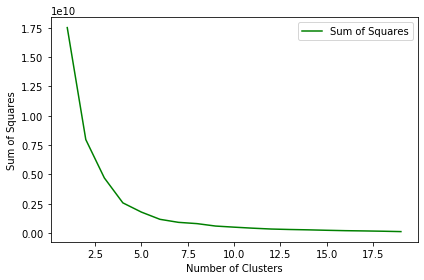

In [121]:
from sklearn.cluster import KMeans 

#Cut out necesary columns - size, income, population, employed, restaurants
drop_cols=list(Riga_stats.columns[0:2])+list(Riga_stats.columns[7:14])
Riga_stats_clustering = Riga_stats.drop(drop_cols, 1)

#Find optimal number of clusters as previously.
K=20
SS=np.zeros((K-1))

for i in range(1,K):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(Riga_stats_clustering)
    SS[i-1] = kmeans.inertia_

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,K),SS,'g')
plt.legend(['Sum of Squares'])
plt.ylabel('Sum of Squares')
plt.xlabel('Number of Clusters')
plt.tight_layout()
plt.savefig('Kmeans_SS_2.png')
plt.show()


Do clustering with optimal number - 6:

In [122]:
kclusters=6
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Riga_stats_clustering)

In [123]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 7,  4,  1, 12, 30,  4]))

In [124]:
#Riga_stats.drop(columns='Cluster Labels', inplace=True)
Riga_stats.head()

,Code,Neighborhood,Size (Ha),Income 2019,Population 2019,Employed 2019*,Restaurants,Pop + Employ 2019,Pop + Employ Density,Rest Density,Inc_Z,P+E_Z,-Rest_Z,RA_index
0,0010025,Purvciems,501.7,1147,55579,16527.0,4.0,72106.0,143.72,0.06,-0.02,1.42,0.39,1.78
1,0010023,Ķengarags,519.0,989,46541,12525.0,1.0,59066.0,113.81,0.02,-0.62,0.95,0.45,0.77
2,0010010,Imanta,900.3,1093,44189,15036.0,2.0,59225.0,65.78,0.03,-0.23,0.19,0.42,0.39
3,0010040,Pļavnieki,298.5,1028,42048,8301.0,3.0,50349.0,168.67,0.06,-0.48,1.81,0.38,1.71
4,0010034,Centrs,373.2,1521,30557,73642.0,28.0,104199.0,279.20,0.27,1.40,3.54,0.03,4.98


Add cluster labels to main dataframe and extract list of neighborhoods in each cluster:

In [125]:
Riga_stats_clust=Riga_stats
Riga_stats_clust.insert(2, 'Cluster Labels', kmeans.labels_)

In [134]:
Riga_stats_clust[Riga_stats_clust['Cluster Labels']==5].reset_index(drop=True)

,Code,Neighborhood,Cluster Labels,Size (Ha),Income 2019,Population 2019,Employed 2019*,Restaurants,Pop + Employ 2019,Pop + Employ Density,Rest Density,Inc_Z,P+E_Z,-Rest_Z,RA_index
0,0010025,Purvciems,5,501.7,1147,55579,16527.0,4.0,72106.0,143.72,0.06,-0.02,1.42,0.39,1.78
1,0010023,Ķengarags,5,519.0,989,46541,12525.0,1.0,59066.0,113.81,0.02,-0.62,0.95,0.45,0.77
2,0010010,Imanta,5,900.3,1093,44189,15036.0,2.0,59225.0,65.78,0.03,-0.23,0.19,0.42,0.39
3,0010040,Pļavnieki,5,298.5,1028,42048,8301.0,3.0,50349.0,168.67,0.06,-0.48,1.81,0.38,1.71


Compile cluster profiles with mean values for each feature:

In [65]:
Riga_clusters=Riga_stats_clust.groupby('Cluster Labels').mean()
Riga_clusters=pd.concat([Riga_clusters[Riga_clusters.columns[0:7]].round(0),Riga_clusters[Riga_clusters.columns[7:12]].round(2)],axis=1)
Riga_clusters

,Size (Ha),Income 2019,Population 2019,Employed 2019*,Restaurants,Pop + Employ 2019,Pop + Employ Density,Rest Density,Inc_Z,P+E_Z,-Rest_Z,RA_index
Cluster Labels,,,,,,,,,,,,
0,424.0,1384.0,4575.0,13884.0,7.0,18458.0,75.0,0.35,0.88,0.33,-0.10,1.12
1,571.0,1134.0,27634.0,20635.0,6.0,48268.0,88.0,0.13,-0.07,0.54,0.27,0.73
2,373.0,1521.0,30557.0,73642.0,28.0,104199.0,279.0,0.27,1.40,3.54,0.03,4.98
3,510.0,1096.0,16835.0,10148.0,3.0,26983.0,85.0,0.11,-0.21,0.49,0.30,0.58
4,530.0,1123.0,2202.0,1476.0,1.0,3677.0,15.0,0.40,-0.11,-0.61,-0.19,-0.91
5,555.0,1064.0,47089.0,13097.0,2.0,60186.0,123.0,0.04,-0.34,1.09,0.41,1.16


## 5. Map the Clusters

Add back location data of neighborhoods to be able to map the clusters:

In [137]:
Riga_stats_clust=Riga_stats_clust.merge(R_df,on='Neighborhood',how='left')
Riga_stats_clust.head()

,Code,Neighborhood,Cluster Labels,Size (Ha),Income 2019,Population 2019,Employed 2019*,Restaurants,Pop + Employ 2019,Pop + Employ Density,Rest Density,Inc_Z,P+E_Z,-Rest_Z,RA_index,Neighborhood Latitude,Neighborhood Longitude
0,0010025,Purvciems,5,501.7,1147,55579,16527.0,4.0,72106.0,143.72,0.06,-0.02,1.42,0.39,1.78,56.958082,24.183964
1,0010023,Ķengarags,5,519.0,989,46541,12525.0,1.0,59066.0,113.81,0.02,-0.62,0.95,0.45,0.77,56.907456,24.182713
2,0010010,Imanta,5,900.3,1093,44189,15036.0,2.0,59225.0,65.78,0.03,-0.23,0.19,0.42,0.39,56.956672,24.015233
3,0010040,Pļavnieki,5,298.5,1028,42048,8301.0,3.0,50349.0,168.67,0.06,-0.48,1.81,0.38,1.71,56.939660,24.204092
4,0010034,Centrs,2,373.2,1521,30557,73642.0,28.0,104199.0,279.20,0.27,1.40,3.54,0.03,4.98,56.957127,24.115620


In [139]:
#!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c conda-forge geopy --yes 

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         393 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5

Map the clusters:

In [140]:
import folium # map rendering library
from geopy.geocoders import Nominatim

address = 'Riga'

#loaction for the center of the map
geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, rest in zip(Riga_stats_clust['Neighborhood Latitude'], Riga_stats_clust['Neighborhood Longitude'], 
                                  Riga_stats_clust['Neighborhood'], 
                                  Riga_stats_clust['Cluster Labels'],Riga_stats_clust['Restaurants']):
    label = folium.Popup(str(poi) + ', Cluster ' + str(cluster) + ', ' + str('{:n}'.format(rest))+' restaurants', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3+rest,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


Cut out Teika restaurant data:

In [143]:
Riga_N=Riga_rest[Riga_rest['Neighborhood']=='Teika']
Riga_N

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
48,Teika,56.974867,24.175168,Wok Street,56.974070,24.169077,Asian Restaurant
49,Teika,56.974867,24.175168,Fei Fei,56.978424,24.184510,Chinese Restaurant
50,Teika,56.974867,24.175168,Lodziņš - Ēstuve,56.972087,24.172200,Eastern European Restaurant
51,Teika,56.974867,24.175168,kebab factory,56.977482,24.180972,Kebab Restaurant
52,Teika,56.974867,24.175168,Mākonis (Teika),56.976840,24.165949,Restaurant
53,Teika,56.974867,24.175168,Ēlande Krodziņš,56.977894,24.181823,Diner


And map Teika restaurants (easily applicable to any other neighborhood):

In [144]:

#Set map center to given neighborhood
latitude = Riga_N.iloc[0,1]
longitude = Riga_N.iloc[0,2]

# create map
map_clusters_N = folium.Map(location=[latitude, longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters+1)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, ven, ven_cat in zip(Riga_N['Venue Latitude'], Riga_N['Venue Longitude'], 
                                  Riga_N['Venue'], 
                                  Riga_N['Venue Category']):
    label = folium.Popup(str(ven) + ', ' + str(ven_cat), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[1],
        fill=True,
        fill_color=rainbow[1],
        fill_opacity=0.7).add_to(map_clusters_N)
       
map_clusters_N